In [65]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("naml_exams"):
    os.chdir("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 1


In [66]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread

Consider the picture of the Duomo di Milano given in file duomo.jpg.


In [67]:
image_path = "data/duomo.jpg"
img = imread(image_path)
A = np.mean(np.array(img, dtype=np.float64) / 255, axis=-1)
A.shape

(902, 1200)

(np.float64(-0.5), np.float64(1199.5), np.float64(901.5), np.float64(-0.5))

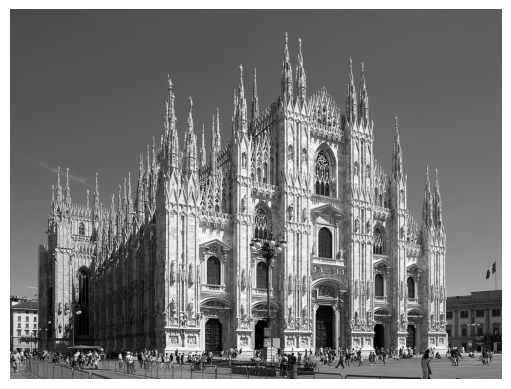

In [68]:
plt.imshow(A, cmap="gray")
plt.axis("off")

Compute the SVD associated with the picture, by using the standard algorithm, that gives the exact (up to round-off errors) decomposition.


In [69]:
U, s, VT = np.linalg.svd(A, full_matrices=False)
U.shape, s.shape, VT.shape

((902, 902), (902,), (902, 1200))

Then, plot the trend w.r.t. $i$ of the singular values $σ_i$ .


Text(0.5, 1.0, 'singular values')

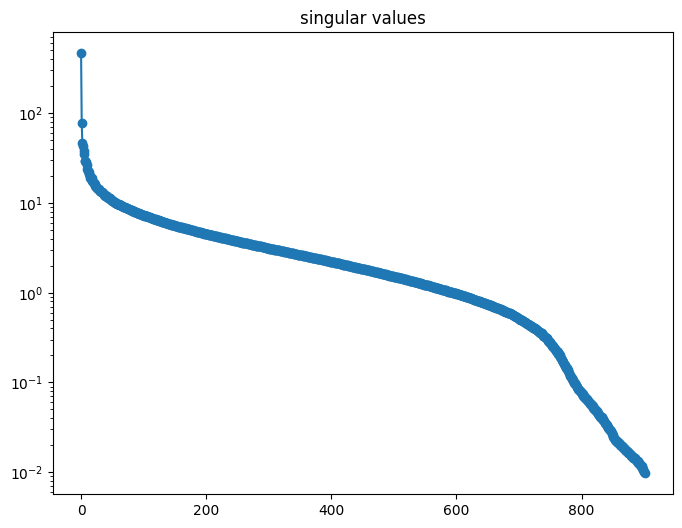

In [70]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

axs.semilogy(s, "o-")
axs.set_title("singular values")

Then, repeat the computation by considering the randomized SVD algorithm of rank $k = 25,50,100,200$ and $400$.


In [71]:
def randomized_SVD(X, k):
    _, m = X.shape[0], X.shape[1]
    G = np.random.randn(m, k)  # Build the gaussian random matrix (namely G)
    Y = X @ G  # Define Y as the matrix multiplication
    Q, R = np.linalg.qr(Y)  # Apply the QR factorization on Y
    B = Q.T @ X  # Define the matrix B
    U_Y, s, VT = np.linalg.svd(B, full_matrices=False)  # Apply SVD on B
    U = Q @ U_Y  # Lifting up U_Y
    return U, s, VT

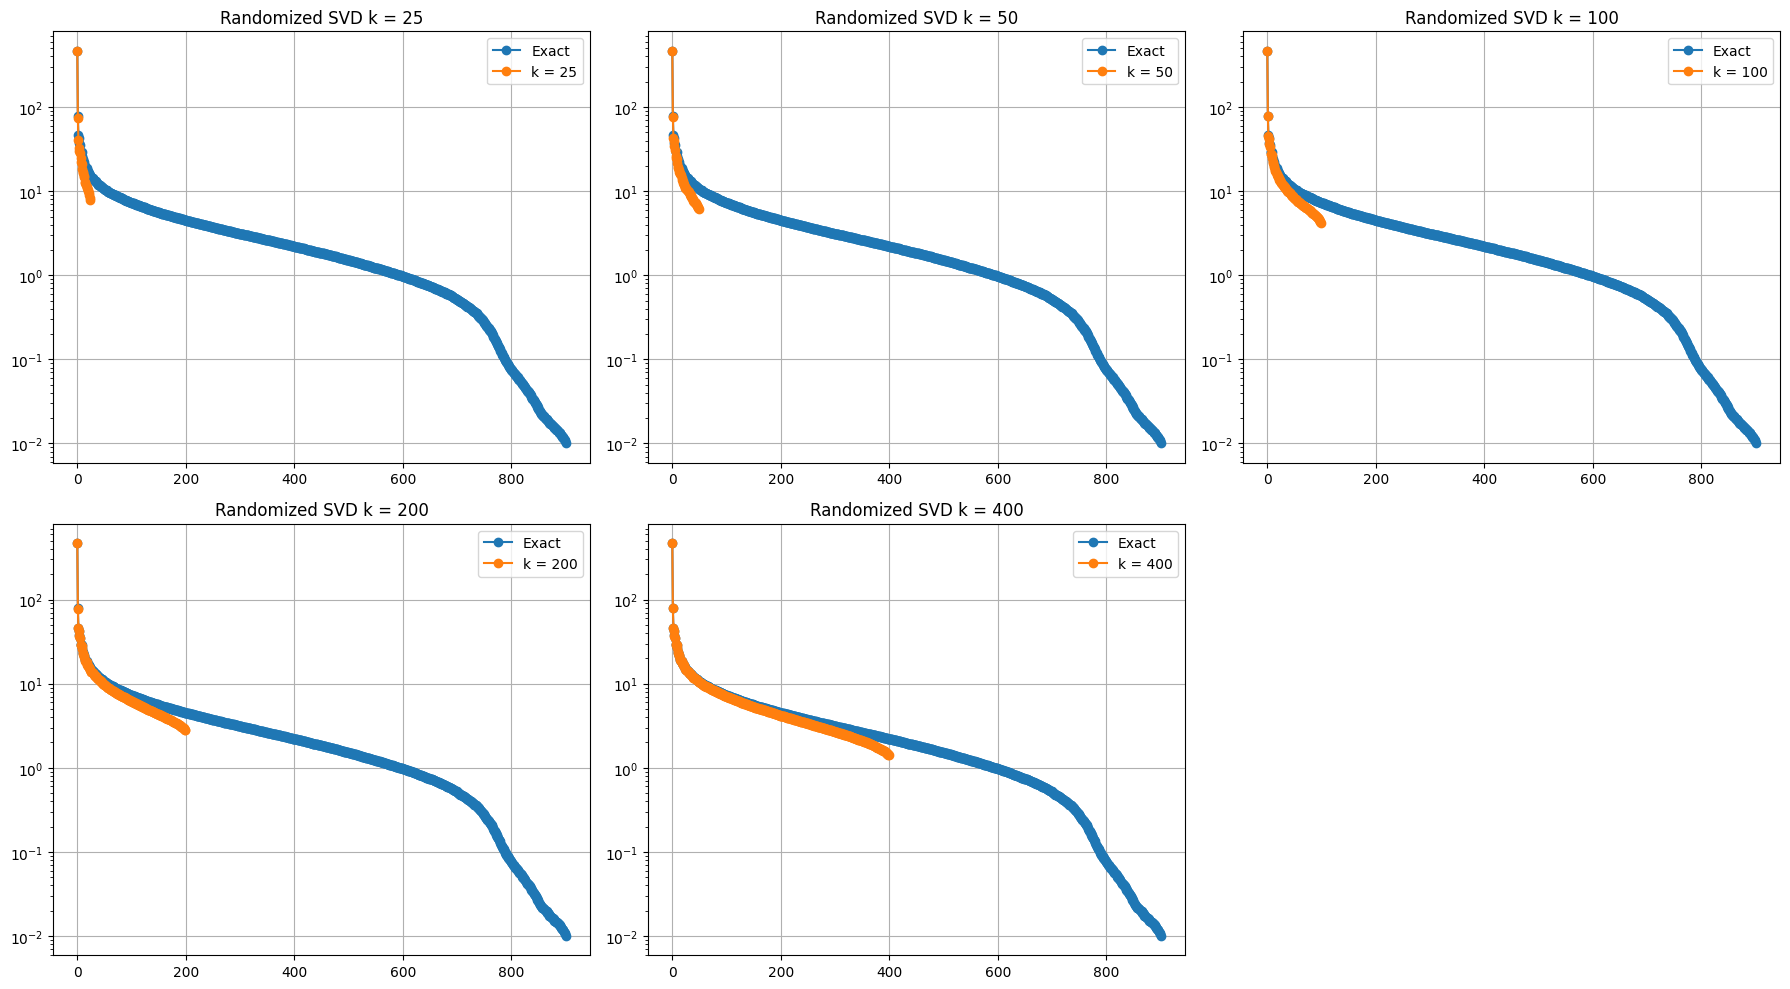

In [72]:
ks = [25, 50, 100, 200, 400]
singular_values_list = []

for k in ks:
    _, randS, _ = randomized_SVD(A, k)
    singular_values_list.append(randS)

# Create 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # flatten for easy indexing

for i in range(len(ks)):
    axes[i].semilogy(s[:-1], "o-", label="Exact")
    axes[i].semilogy(singular_values_list[i], "o-", label=f"k = {ks[i]}")
    axes[i].set_title(f"Randomized SVD k = {ks[i]}")
    axes[i].legend()
    axes[i].grid(True)

# Hide unused subplot (last one in 2x3 if only 5 plots)
for j in range(len(ks), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

By increasing the number of k (which is the lower-dimension considered in RSVD) we obtain a better approximation of the first singular values meanwhile in the tail the approximation tends to be worst. This is one of the reason for which the idea of oversampling is introduced.


We now want to compress the image. Use the exact SVD to perform image compression for rank $k = 25,50,100,200$ and $400$.


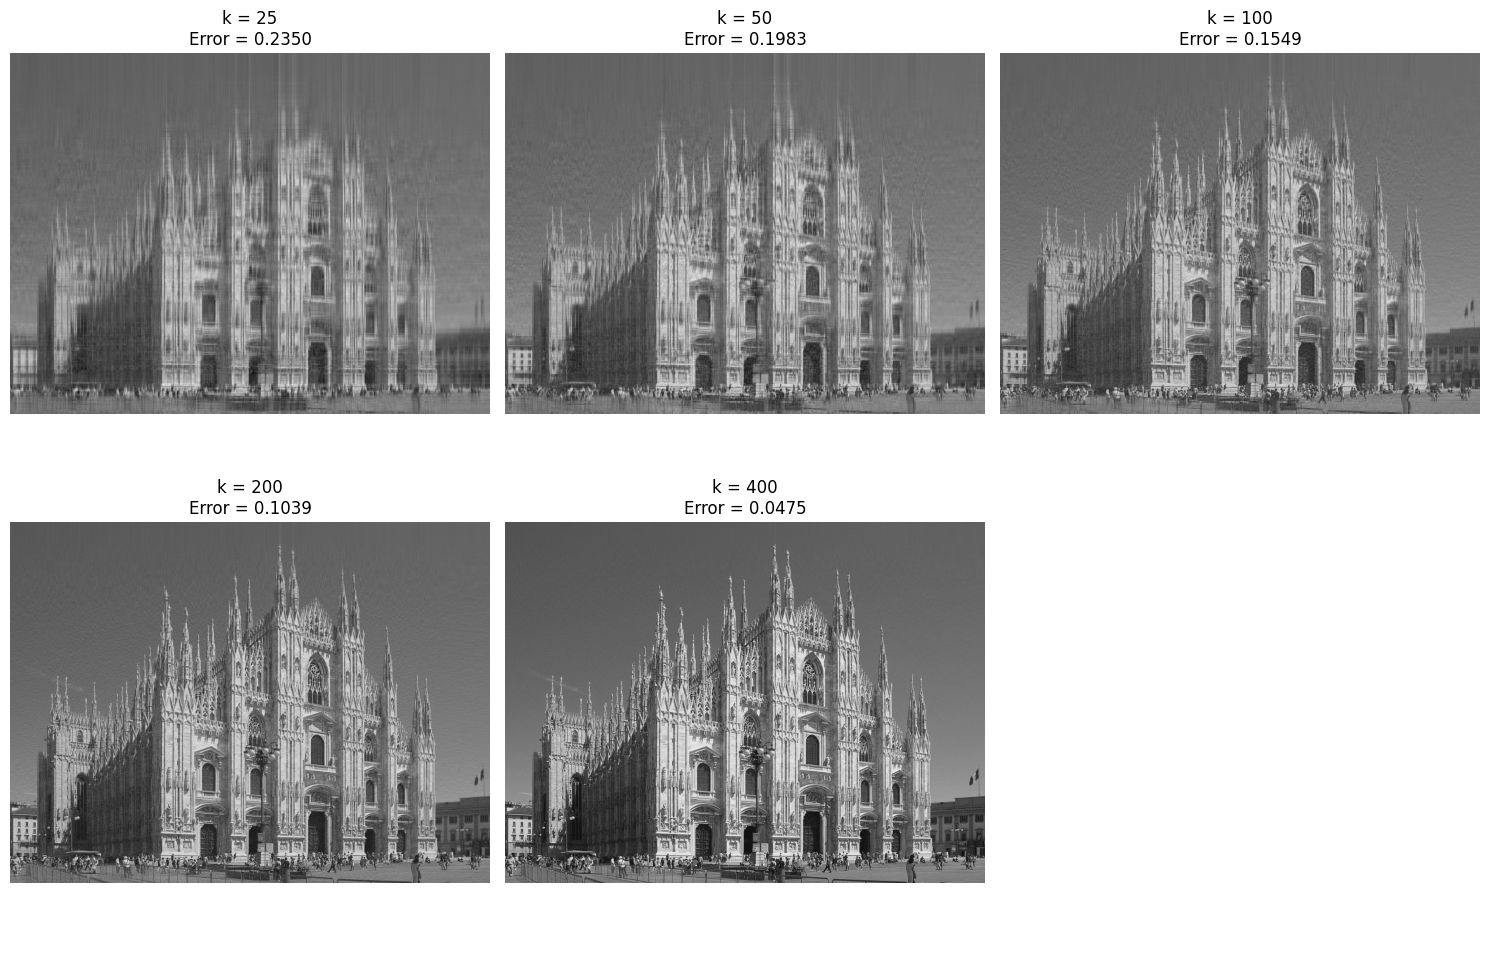

In [73]:
ks = [25, 50, 100, 200, 400]
recon_error = []

U, s, VT = np.linalg.svd(A, full_matrices=False)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, k in enumerate(ks):
    Ak = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    error = np.linalg.norm(A - Ak) / np.linalg.norm(A)
    recon_error.append(error)

    axs[i].imshow(Ak, cmap="gray")
    axs[i].set_title(f"k = {k}\nError = {error:.4f}")
    axs[i].axis("off")

# Hide the unused subplot
if len(ks) < len(axs):
    axs[-1].axis("off")

plt.tight_layout()
plt.show()


Repeat the same exercise by using the randomized SVD algorithm.


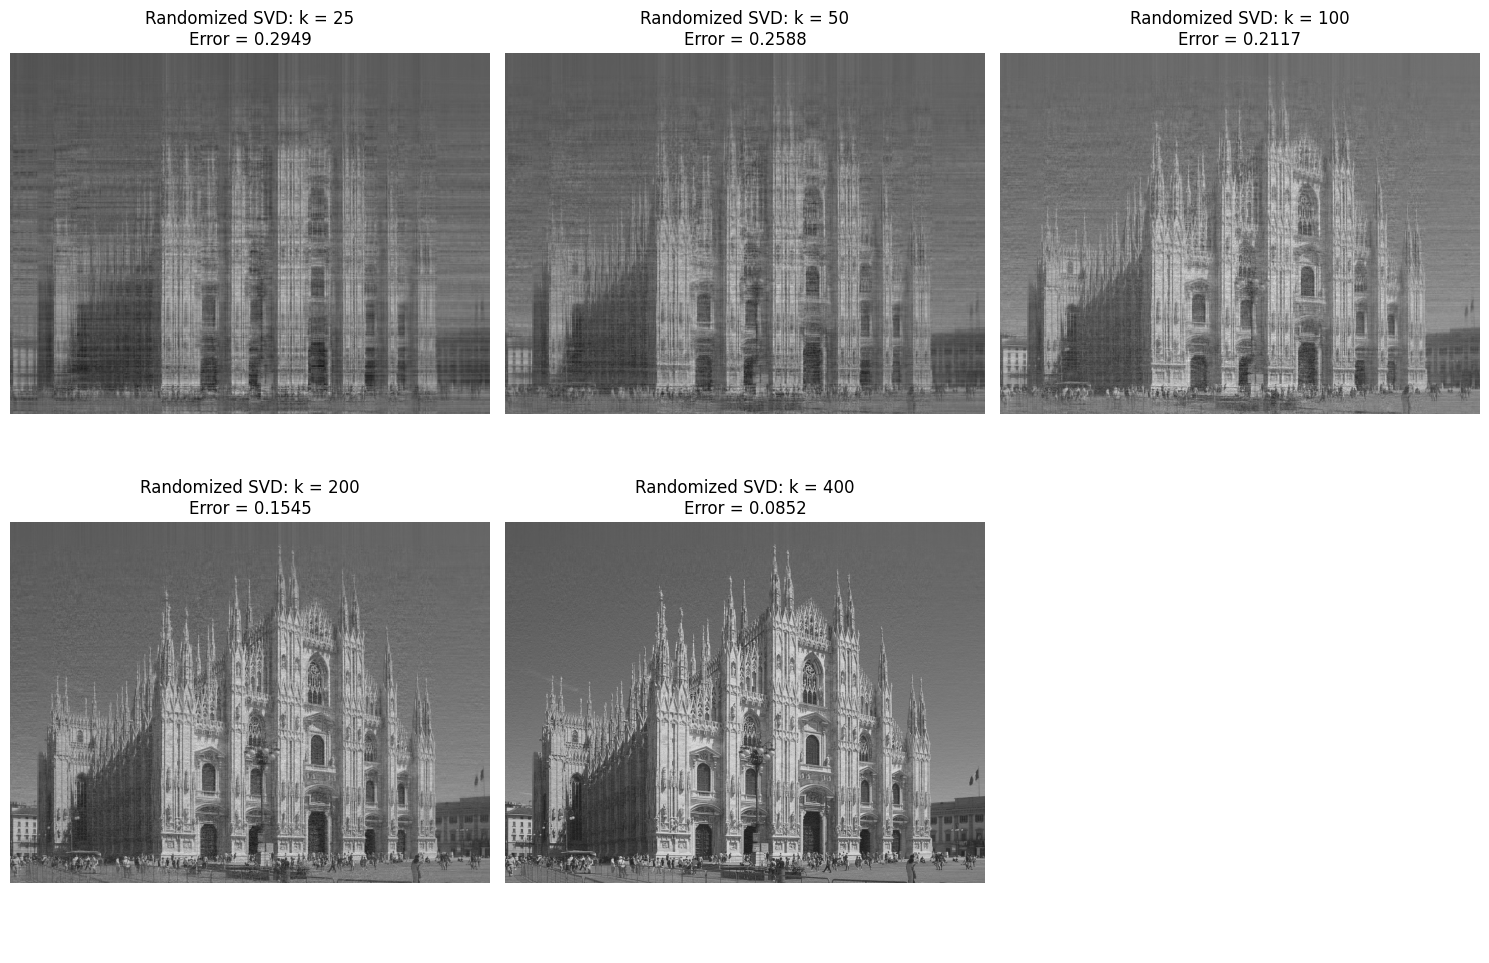

In [74]:
ks = [25, 50, 100, 200, 400]
recon_error_rand = []

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, k in enumerate(ks):
    # Compute randomized SVD
    U_rand, s_rand, VT_rand = randomized_SVD(A, k)

    # Reconstruct the matrix
    Ak_rand = U_rand @ np.diag(s_rand) @ VT_rand

    # Compute relative reconstruction error
    error = np.linalg.norm(A - Ak_rand) / np.linalg.norm(A)
    recon_error_rand.append(error)

    # Display reconstructed image
    axs[i].imshow(Ak_rand, cmap="gray")
    axs[i].set_title(f"Randomized SVD: k = {k}\nError = {error:.4f}")
    axs[i].axis("off")

# Hide the last unused subplot if any
if len(ks) < len(axs):
    axs[-1].axis("off")

plt.tight_layout()
plt.show()


Repeat the same exercise by using the randomized SVD algorithm with a +50% oversampling, that is by increasing by 50% the number of columns in the matrix random P (round the quantity 1.5k to the closest integer).


In [75]:
def randomized_SVD_oversampling(A, k):
    _, m = A.shape[0], A.shape[1]
    G = np.random.randn(
        m, round(k * 1.5)
    )  # Build the gaussian random matrix (namely G)
    Y = A @ G  # Define Y as the matrix multiplication
    Q, R = np.linalg.qr(Y)  # Apply the QR factorization on Y
    B = Q.T @ A  # Define the matrix B
    U_Y, s, VT = np.linalg.svd(B, full_matrices=False)  # Apply SVD on B
    U = Q @ U_Y  # Lifting up U_Y
    return U, s, VT

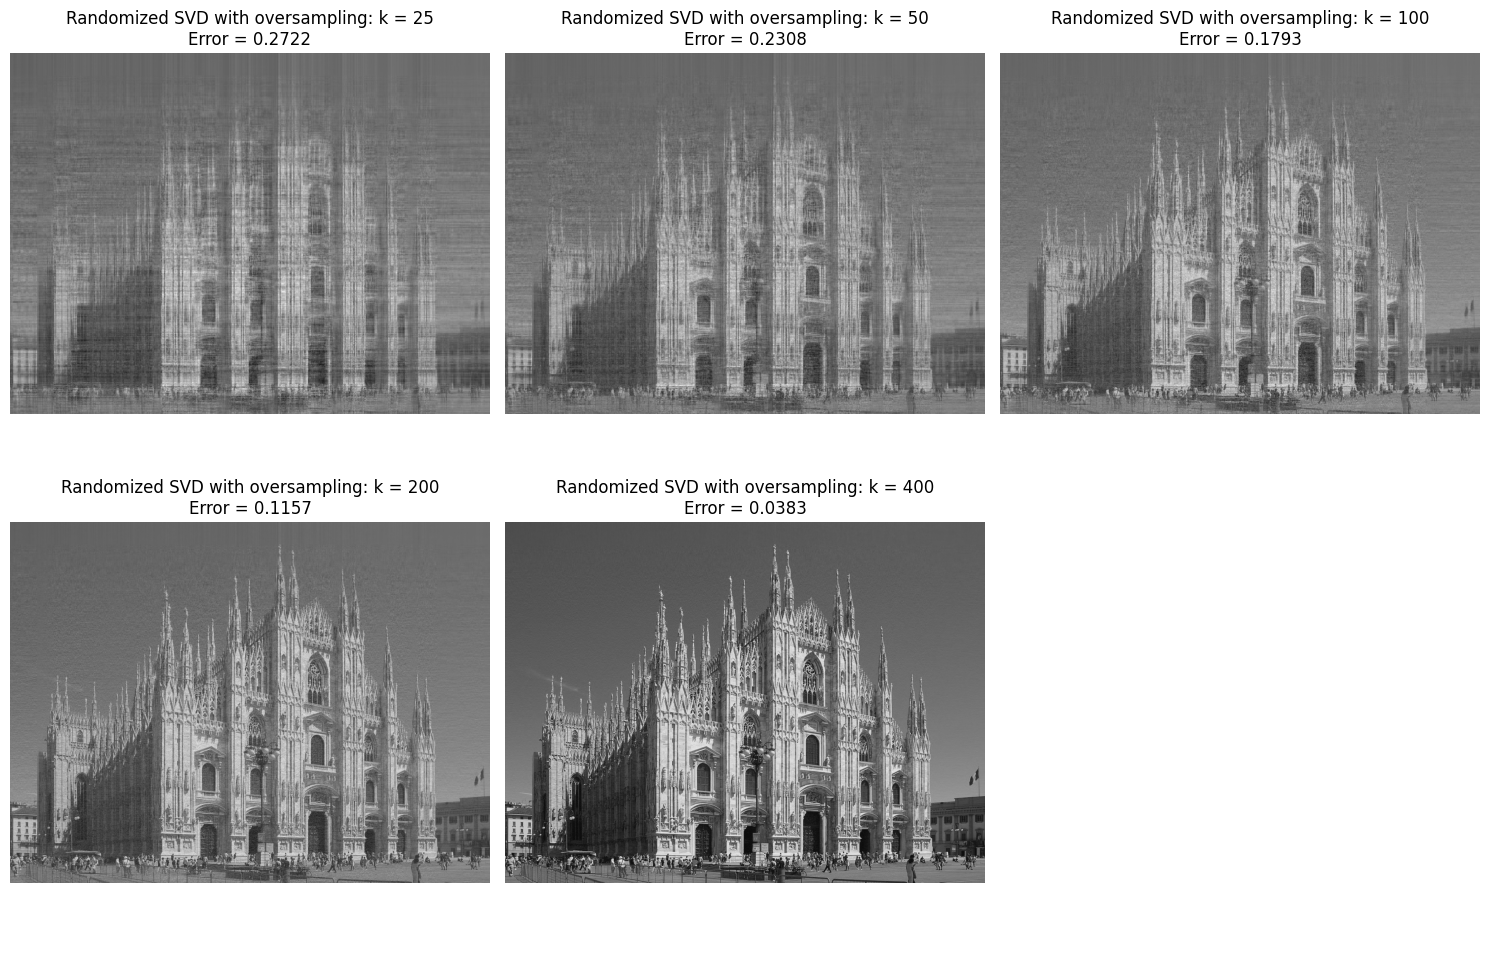

In [76]:
ks = [25, 50, 100, 200, 400]
recon_error_rand_over = []

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, k in enumerate(ks):
    # Compute randomized SVD
    U_rand, s_rand, VT_rand = randomized_SVD_oversampling(A, k)

    # Reconstruct the matrix
    Ak_rand = U_rand @ np.diag(s_rand) @ VT_rand

    # Compute relative reconstruction error
    error = np.linalg.norm(A - Ak_rand) / np.linalg.norm(A)
    recon_error_rand_over.append(error)

    # Display reconstructed image
    axs[i].imshow(Ak_rand, cmap="gray")
    axs[i].set_title(f"Randomized SVD with oversampling: k = {k}\nError = {error:.4f}")
    axs[i].axis("off")

# Hide the last unused subplot if any
if len(ks) < len(axs):
    axs[-1].axis("off")

plt.tight_layout()
plt.show()


Finally, plot the trend of the reconstruction error of the dataset as a function of k in the three cases. Comment on the results.


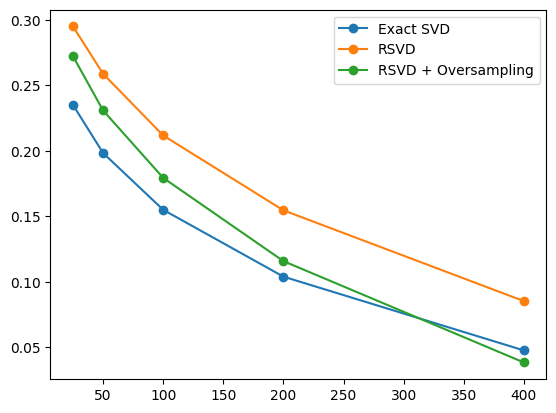

In [77]:
plt.plot(ks, recon_error, "o-", label="Exact SVD")
plt.plot(ks, recon_error_rand, "o-", label="RSVD")
plt.plot(ks, recon_error_rand_over, "o-", label="RSVD + Oversampling")
plt.legend()

As expected, given the same k, we obtain the best reconstruction using the exact SVD. Furthermore the RSVD + oversampling is actually improving the performance of the plain RSVD. In order to have another comparison we need to evaluate the time needed to execute the algorithms.


Evaluate the time needed to compute the SVD with the three approaches (SVD, randomized SVD, randomized SVD with oversampling) in the case $k = 200$.


In [78]:
k = 200

In [79]:
# Exact SVD
%timeit np.linalg.svd(A, full_matrices=False)

747 ms ± 111 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [80]:
# Randomized
%timeit randomized_SVD(A, k)

222 ms ± 68.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [81]:
# Randomized with oversampling
%timeit randomized_SVD_oversampling(A, k)

312 ms ± 26.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Exericse 2


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, hessian

Consider the following function (where $ \textbf{x} = (x, y)$)

$$ f(\textbf{x}) = 5x^2 - 6xy + 5y^2 +4x + 4y $$


In [83]:
def f(x, y):
    return 5 * x**2 - 6 * x * y + 5 * y**2 + 4 * x + 4 * y

Plot the function.


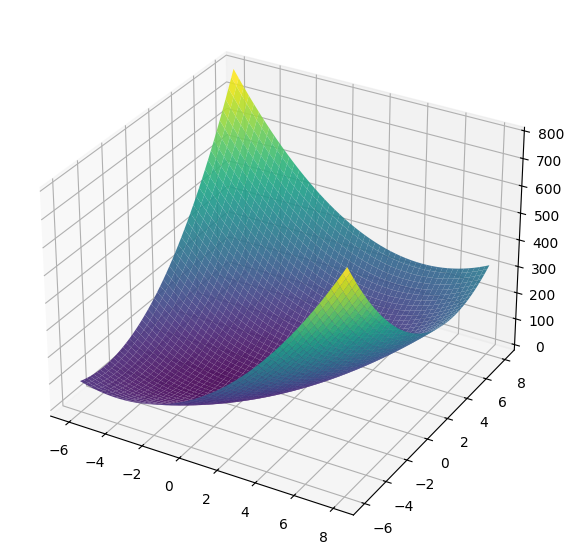

In [84]:
x = np.linspace(-6, 8, 200)
y = np.linspace(-6, 8, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1, projection="3d")

# Plot the surface
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.9, edgecolor="none")

Compute analitically the value $\textbf{x}_{min}$ where the function attains its minimum value and $f(\textbf{x}_{min})$.


Given the function
$$f(\mathbf{x}) = 5x^2 - 6xy + 5y^2 + 4x + 4y \tag{1}$$
I can find the minimum by computing the gradient and setting it to zero:
$$\nabla f(\mathbf{x}) = \begin{bmatrix} 10x - 6y + 4 \\ -6x + 10y + 4 \end{bmatrix} = \mathbf{0}$$
and obtain the solution
$$\mathbf{x_{min}} = \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} -1 \\ -1 \end{bmatrix}$$
and the minimum value of the function
$$f(\mathbf{x_{min}}) = -4$$


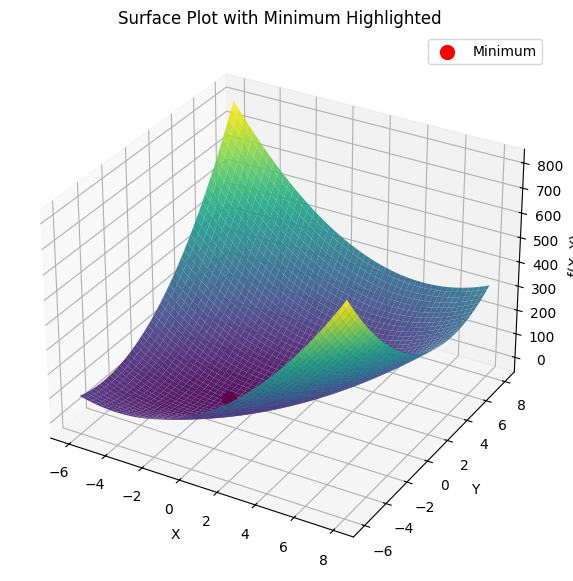

In [85]:
x = np.linspace(-6, 8, 200)
y = np.linspace(-6, 8, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1, projection="3d")

# Plot the surface
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.9, edgecolor="none")

# Highlight the minimum point
min_point = np.array([-1, -1])
z_min = f(min_point[0], min_point[1])
ax.scatter(min_point[0], min_point[1], z_min, c="r", s=100, marker="o", label="Minimum")


# Labels and styling
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(X, Y)")
ax.set_title("Surface Plot with Minimum Highlighted")
ax.legend()

plt.show()

Write $(1)$ as $$ f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T H\mathbf{x} + d^T \mathbf{x} + c \tag{2}$$ Write explicitly the expressions for the matrix $H$, the vector $d$ and the constant $c$. What is $H$ ?


By defining $\mathbf{x}$ as:

$$ \mathbf{x} = \begin{bmatrix} x \\ y \end{bmatrix} $$

We can rewrite (1) as (2) by using:

$$ H = \begin{bmatrix} 10 & -6 \\ -6 & 10 \end{bmatrix}, \quad d^T = \begin{bmatrix} 4 & 4\end{bmatrix}, \quad c = [0]$$

Notice that $H$ is the hessian of the fucntion.


Consider the gradient descent (GD) method $$ x^{k+1} = x^k - \alpha \nabla f(x^k) \tag{3}$$ where α is the learning rate. Combining (2) and (3) find the expression of $α_{max}$ (maximum value of α) such that the GD method is convergent. (Hint: remember that for an iterative method to be convergent the spectral radius ρ of the iteration matrix must satisfy |ρ| < 1)


Let's analyze the convergence condition for the given gradient descent method. The update rule is given by:

$$ x^{k+1} = x^k - \alpha \nabla f(x^k) $$

To analyze convergence, we look at the spectral radius of the iteration matrix. The iteration matrix is defined as the Jacobian of the update rule with respect to the current iterate:

$$ J = I - \alpha H $$

where $H$ is the Hessian matrix, and $I$ is the identity matrix.

The spectral radius $rho$ of the iteration matrix is defined as the maximum absolute eigenvalue of $J$. For convergence, we need $$| \rho | < 1 $$

Let $\lambda_i$ be the eigenvalues of $H$. For the gradient descent to be convergent, $\alpha$ must satisfy:

$$ 0 < \alpha < \frac{2}{\lambda\_{\text{max}}(H)} $$

where $$ \lambda\_{\text{max}}(H) $$ is the maximum eigenvalue of $H$.

So, the expression for $\alpha_{\text{max}}$ such that the gradient descent method is convergent is:

$$ \alpha*{\text{max}} = \frac{2}{\lambda*{\text{max}}(H)} $$


Find the value of $α_{max}$ for the GD method applied to (1).


In [86]:
# Define the variables
x, y = symbols("x y")

# Convert the lambda function to a symbolic expression
f_sympy = f(x, y)

# Compute the Hessian matrix
Hessian_matrix = hessian(f_sympy, [x, y])

# Print the Hessian matrix
print("Hessian Matrix:")
print(Hessian_matrix)

Hessian Matrix:
Matrix([[10, -6], [-6, 10]])


In [87]:
# Exploit the formula above
alpha_max = 2 / 16
print("aplha_max = %.3f" % alpha_max)

aplha_max = 0.125


Implement the GD method and verify the conclusion drawn at the previous point.

Use the stopping criterium E < ϵ where E is the absolute value of the difference of the last two functional values i.e. $$ E = |f(x^{k+1}) − f(x^k)|, $$ and $\epsilon$ is the required tolerance (take $\epsilon = 10^{−3}$).

Moreover set the maximum number of iterations to 200 and the initial guess equal to $x^0 = (−5, 7)$.


In [88]:
def gradientx(x, y):
    return 10 * x - 6 * y + 4


def gradienty(x, y):
    return -6 * x + 10 * y + 4

In [89]:
def plot_convergence(tol, n_iter, alpha, xk):
    convergence_path = [xk.copy()]
    old_xk = xk.copy()

    for i in range(n_iter):
        # Compute gradient
        grad = np.array([gradientx(xk[0], xk[1]), gradienty(xk[0], xk[1])])

        # Gradient descent step
        xk = xk - alpha * grad

        # Check convergence
        if np.abs(f(xk[0], xk[1]) - f(old_xk[0], old_xk[1])) < tol:
            break

        old_xk = xk.copy()
        convergence_path.append(xk.copy())

    print("Final point:", xk)
    print("Function value:", f(xk[0], xk[1]))
    print("Iterations:", i + 1)

    # === Plot the contour and path ===
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=20, cmap="viridis")
    plt.colorbar(label="f(x, y)")

    # Plot convergence path
    path = np.array(convergence_path)
    plt.plot(path[:, 0], path[:, 1], "ro-", label="Convergence path")
    plt.scatter(
        path[0, 0], path[0, 1], c="white", edgecolor="black", s=100, label="Start"
    )
    plt.scatter(path[-1, 0], path[-1, 1], c="red", s=100, label="End")

    plt.xlim([-6, 8])
    plt.ylim([-6, 8])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Gradient Descent Convergence Path")
    plt.legend()
    plt.grid(True)
    plt.show()


Final point: [-6.9921875  5.0078125]
Function value: 572.000244140625
Iterations: 8


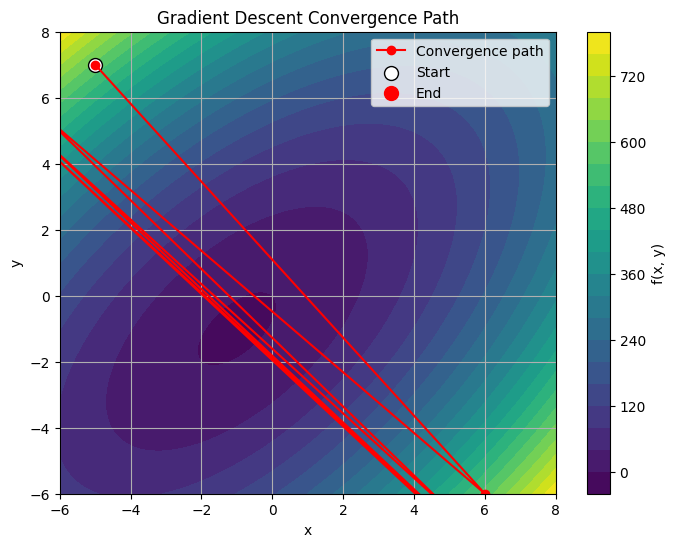

In [90]:
plot_convergence(tol=1e-3, n_iter=200, alpha=alpha_max, xk=np.array([-5.0, 7.0]))

Final point: [-6.9921875  5.0078125]
Function value: 572.000244140625
Iterations: 8


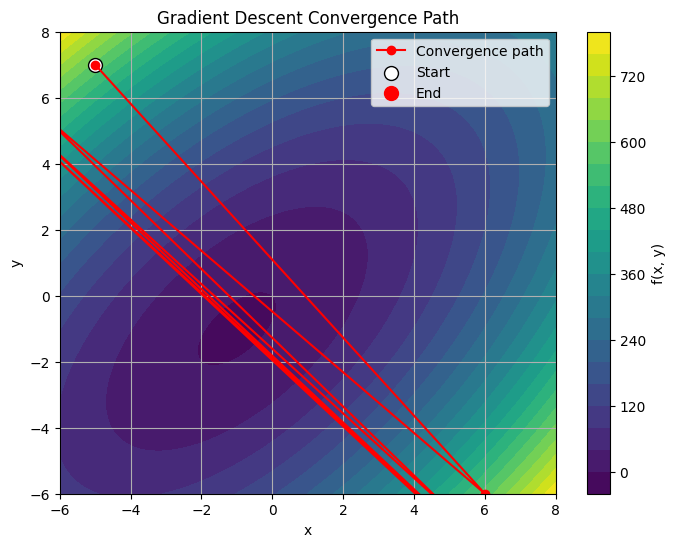

In [91]:
plot_convergence(tol=1e-3, n_iter=200, alpha=alpha_max, xk=np.array([-5.0, 7.0]))

As we can see with learning rate set as the maximum possible value, the algorithm diverges. We must choose a value that is strictly less than $\alpha_{max}$


If on the other hand we put the optimal value, it converges to the exact solution in just 14 iterations


Final point: [-6.9921875  5.0078125]
Function value: 572.000244140625
Iterations: 8


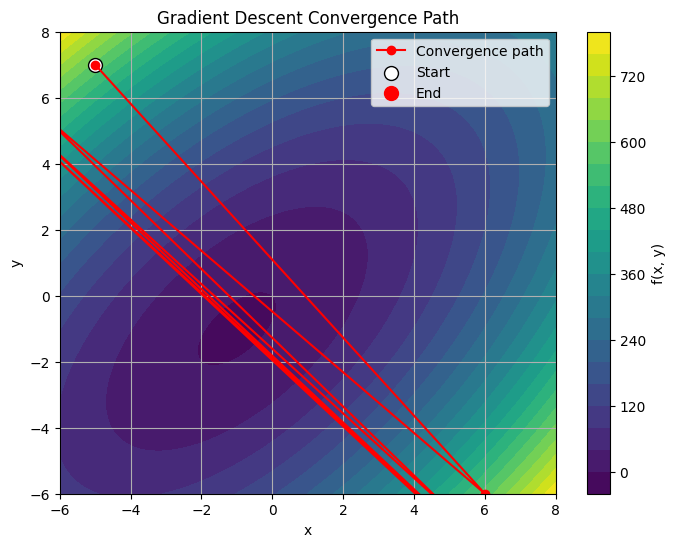

In [92]:
plot_convergence(tol=1e-3, n_iter=200, alpha=alpha_max, xk=np.array([-5.0, 7.0]))

If on the other hand we put the optimal value, it converges to the exact solution in just 14 iterations


Final point: [-1.00313457 -0.99373087]
Function value: -3.9996364562209044
Iterations: 14


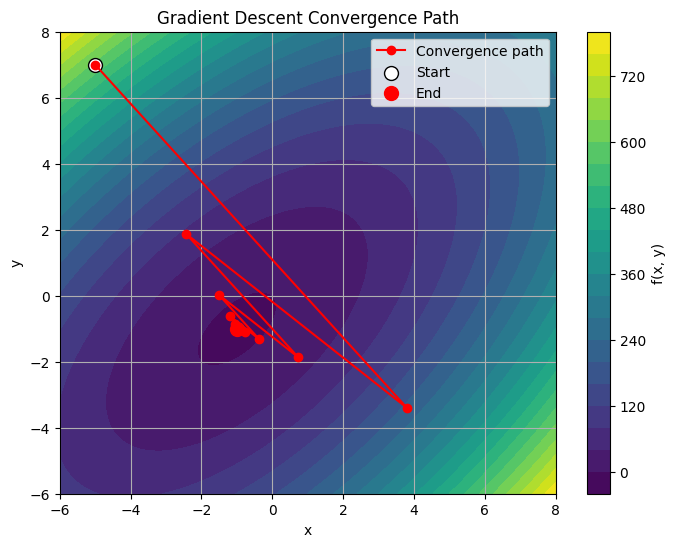

In [93]:
plot_convergence(tol=1e-3, n_iter=200, alpha=0.1, xk=np.array([-5.0, 7.0]))